## Load Data List
### Load xml Data (Valid, Test)

In [1]:
import xml.etree.ElementTree as ET

# Validset
filePath = 'D:\chinese\zh-en\IWSLT12.TALK.dev2010.zh-en.zh.xml'
tree = ET.parse(filePath)
root = tree.getroot()

validset = []

for child in root[0]:
    for i in child:
        if i.tag == 'seg':
            validset.append(i.text)
len(validset)

934

In [2]:
# Testset
filePath = 'D:\chinese\zh-en\IWSLT12.TALK.tst2010.zh-en.zh.xml'
tree = ET.parse(filePath)
root = tree.getroot()

testset = []

for child in root[0]:
    for i in child:
        if i.tag == 'seg':
            testset.append(i.text)
len(testset)

1664

### Load Train Data

In [3]:
# Trainset
filePath = 'D:\chinese\zh-en/train.tags.zh-en.zh'
f = open(filePath, 'r', encoding='utf-8')
data = f.readlines()
trainset = [i for i in data if i[0]!='<']
len(trainset)

138757

## Preprocess Data

In [11]:
# Preprocess Data
def preprocess_data(name, references):
    print(f'Preprocess {name} data...')
    f = open(f"D:\chinese\Chinese\data\zh_iwslt_14punc/{name}.txt", 'w', encoding='utf-8')
    punctuations = ['，', ',', '。', '!', '！', '？', '?', '；', ';', ':', '：', '‘', '“', '”', '’', '…', '─', '—', '、', '·', '（', '(', '）', ')', '《', '》', '　', ' ', '\n']
    for i in references:
        i = i.replace('...', '…')
        for j in range(len(i)):
            if i[j] not in punctuations:
                try:
                    if (i[j]>='\u2E80' and i[j]<='\u2EFF') or (i[j]>='\u3400' and i[j]<='\u4DB5') or (i[j]>='\4E00', i[j]<='\u9FBF'):
                        if i[j+1] in ['，', ',']:
                            f.write(i[j] + '\t' + ',' + '\n')

                        elif i[j+1] in ['。']:
                            f.write(i[j] + '\t' + '。' + '\n')

                        elif i[j+1] in ['!', '！']:
                            f.write(i[j] + '\t' + '!' + '\n')

                        elif i[j+1] in ['？', '?']:
                            f.write(i[j] + '\t' + '?' + '\n')
                            
                        elif i[j+1] in ['；', ';']:
                            f.write(i[j] + '\t' + ';' + '\n')
                            
                        elif i[j+1] in [':', '：']:
                            f.write(i[j] + '\t' + ':' + '\n')
                            
                        elif i[j+1] in ['‘', '“']:
                            f.write(i[j] + '\t' + '“' + '\n')

                        elif i[j+1] in ['”', '’']:
                            f.write(i[j] + '\t' + '”' + '\n')

                        elif i[j+1] in ['…']:
                            f.write(i[j] + '\t' + '…' + '\n')

                        elif i[j+1] in ['─', '—', '—']:
                            f.write(i[j] + '\t' + '—' + '\n')

                        elif i[j+1] in ['、']:
                            f.write(i[j] + '\t' + '、' + '\n')
                            
                        elif i[j+1] in ['·']:
                            f.write(i[j] + '\t' + '·' + '\n')
                            
                        elif i[j+1] in ['《']:
                            f.write(i[j] + '\t' + '《' + '\n')
                            
                        elif i[j+1] in ['》']:
                            f.write(i[j] + '\t' + '》' + '\n')                        
                        else:
                            f.write(i[j] + '\t' + 'O' + '\n')
                except:
                    pass
    f.close()

In [12]:
preprocess_data('train', trainset)
preprocess_data('valid', validset)
preprocess_data('test', testset)

Preprocess train data...
Preprocess valid data...
Preprocess test data...


## Count Punctuation

In [2]:
import pandas as pd
import numpy as np

def count_punctuation(name):
    f = open(f"D:\chinese\Chinese\data\zh_iwslt_14punc/{name}.txt", 'r', encoding='utf-8')
    data = f.readlines()
    data = [i.split('\t')[1][0] for i in data]
    count = [data.count('O'), data.count(','), data.count('。'), data.count('!'), data.count('?'), data.count(';'), data.count(':'), data.count('“'), data.count('”'),
            data.count('…'), data.count('—'), data.count('、'), data.count('·'), data.count('《'), data.count('》')]
    result = pd.DataFrame(
        np.array([count]), 
        columns=list(['O', ',', '。', '!', '?', ';', ':', '“', '”', '…', '—', '、', '·', '《', '》']),
        index = ['Count']
    )

    return result

In [7]:
count_punctuation('train')

,O,",",。,!,?,;,:,“,”,…,—,、,·,《,》
Count,3430148,127995,85669,1295,10810,825,8005,3915,4802,611,2859,3682,1648,498,626


In [15]:
count_punctuation('valid')

,",",。,!,?,;,:,“,”,…,—,、,·,《,》
Count,972,424,19,96,2,106,40,57,0,6,33,3,8,8


In [16]:
count_punctuation('test')

,",",。,!,?,;,:,“,”,…,—,、,·,《,》
Count,1780,896,10,147,4,105,46,67,3,13,109,9,23,28


In [21]:
def count_punctuation(name):
    f = open(f"D:\chinese\Chinese\data\zh_iwslt_14punc/{name}.txt", 'r', encoding='utf-8')
    data = f.readlines()
    data = [i.split('\t')[1][0] for i in data]
    count = [data.count('O'), data.count(','), data.count('。'), data.count('!')+data.count('?')+data.count(';')+data.count(':')+data.count('“')+data.count('”')+data.count('…')+data.count('—')+data.count('、')+data.count('·')+data.count('《')+data.count('》')]
    result = pd.DataFrame(
        np.array([count]), 
        columns=list(['O', ',', '。', 'others']),
        index = ['Count']
    )

    return result
result = count_punctuation('train').transpose()

[]

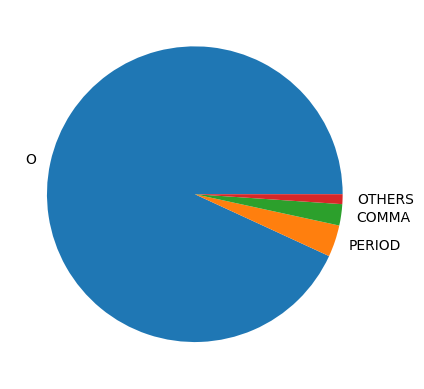

In [22]:
import matplotlib.pyplot as plt

plt.pie(result['Count'], labels = ['O', 'PERIOD', 'COMMA', 'OTHERS'])
plt.plot()